<html lang="en">

    

<style>
        body{
            background-color: rgb(238, 238, 238) !important;
        }
        h2 {
            font-family:Arial, Helvetica, sans-serif;
            font-weight: bold;
            text-indent: 20%;
        }
        h3 {
            font-family:Arial, Helvetica, sans-serif;
            font-size: 140%;
            font-weight: bold;
            color: purple;
        }
</style>

    

    
<br><br><br><br><br><br><br><br>
    
<br><br><br><br><br><br><br><br>

   

<font size=7 color="black">
        <center>                     Exoplanet Orbits : A Statistical Analysis.</center>
    </font>
    
    
<br><br><br><br><br><br><br><br>
    
<br><br><br><br><br><br><br><br>
    
    
    



<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
    



*********************
   
# Kepler 442 b    
 
**********************

 <br><br>    
<img src="https://github.com/TheReallyBigApple/CunyAssignments/raw/main/DATA607/FinalProject/Kepler-442b_and_Earth.jpg" alt="Kepler 442 b" style="float:center" width="800" height="600" title="Kepler 442 b and Earth."  >
 <br><br> 
Above is an artists rendition of Kepler-442b and a picture of the planet Earth. Kepler-442b is an Earth-sized exoplanet.
It is likely rocky, and exists within the habitable zone of its K-type main-sequence star. It exists 1206 light-years away from us, in the constellation Lyra. Out of the 4565 exoplanets discovered to date, Kepler 442 b is described as being perhaps the most Earth-like exoplanet so far discovered.<a name=cite-one></a><a href="#bib-one">&#91;1&#93;</a>

Kepler 442 b takes 113 days to complete an orbit of its sun. It has an orbital inclination of 90, meaning it orbits at a 90 degree angle from our line of sight. It has an orbital eccentricity of 0.04, nearly a perfect circle. 

 <br><br>  <br><br> 


<br><br><br><br>

***

# Project Overview

***
This project will conduct an analysis on the orbits of exoplanets, and along the way we will examine some of the more interesting cases. We will focus specifically on the duration of orbits, as they are the most reliable of attributions in the field of exoplanet research.
<br><br>
We will use the [**TAP query service **](https://exoplanetarchive.ipac.caltech.edu/docs/TAP/usingTAP.html) from the online exoplanet archive sponsored by IPAC Caltech.
<br><br>

IPAC was established in 1985 on the campus of the California Institute of Technology as the "Infrared Processing & Analysis Center".<a name=cite-two></a><a href="#bib-two">&#91;3&#93;</a> It has since grown and now partners with NASA, NSF, JPL and the world-wide research community to advance exploration of our Universe. <a name=cite-three></a><a href="#bib-three">&#91;3&#93;</a>

This project will be looking at the distribution of orbits thus far discovered, and attempt to answer why such
distributions exist. Notably, this report will show why inferential statistics is not yet a suitable tool, except to provide insight to the conclusions we would otherwise be making on purely anectodal analysis.
    
<br><br>

<br><br><br><br>

***
# Our Solar System
***

**Before we begin, lets take a look at the orbits from our own system**
<br><br>





Planet	| Obliquity	|	Eccen	| Inclination  |	AU   |  Days
------- | --------- | --------- | ----------   | ------- | ------ 
mercury	|	 0.03	|	0.205	|	  7.0	   |	0.4	 |	  88
venus	|  177.40	|	0.007	|	  3.4	   |	0.7  |	 225
earth	|	23.40	|	0.017	|	  0.0  	   |	1.0  |   365
mars	|	25.20	|	0.094	|	  1.9	   |	1.5  |	 687
jupiter	|	 3.10	|	0.049	|	  1.3	   |	5.2	 |	4343
saturn	|	26.70	|	0.057	|	  2.5	   |	9.5	 | 10767
uranus	|	97.80	|	0.046	|	  0.8	   |   19.1	 | 30660
neptune	|	28.30	|	0.011	|	  1.8 	   |   30.0	 | 60225


Data for this table provided by the NASA Space Science Data Coordinated Archive<a name=cite-four></a><a href="#bib-four">&#91;3&#93;</a>


<br><br>
# Glossary
<br>

 <dl>
         <dt>&emsp;&emsp;Days</dt>
         <dd>&emsp;&emsp; &emsp;&emsp; number of Earth days for a planet to orbit its star</dd>
        <br>
         <dt>&emsp;&emsp;AU</dt>
         <dd>&emsp;&emsp; &emsp;&emsp; number of Astronomical Units the planet is away from its star.
             An Astronomical Unit is the distance the Earth is from the sun
        </dd>
            <br>
         <dt>&emsp;&emsp;Inclination</dt>
         <dd>&emsp;&emsp; &emsp;&emsp; angle in degrees at which a planets orbit around its star is tilted
           relative to the ecliptic plane. Since the ecliptic plane is defined 
        <br>             
        &emsp;&emsp; &emsp;&emsp;  as the plane containing the Earth's orbit, the Earth's inclination is therefore 0
       </dd>
            <br>
     <dt>&emsp;&emsp;Eccentricity</dt>
    <dd>&emsp;&emsp; &emsp;&emsp; how far a planet's orbit about the is from being circular, scaled from 0 to 1, where 0 is a perfect circle
         </dd>
            <br>
        <dt>&emsp;&emsp;Obliquity</dt>
    <dd>&emsp;&emsp; &emsp;&emsp; angle in degrees the axis of a planet is tilted relative to the planet's orbit. Our obliquity of 23 degrees is what causes our seasons
         </dd>
      </dl>      
     


***
# TAP Data Server Class
***

First import the packages.

In [203]:
import pandas as pd
import requests
import os
import numpy as np
import sys
import statistics
import matplotlib.pyplot as plt
from IPython.display import HTML

print("Running on Python version ", sys.version.__str__()[0:5])   # 3.8.5

Running on Python version  3.8.5


<br><br><br><br>
***
<br>

**The DataServer class handles data retrieval from the exoplanet archive**

**The TAP service is a freely available web service. No API key is required.**

**This class saves off the total data set in a csv file and a cached data frame.**

**Additionaly it provides queries on the cached data frame.**

<br>
***
<br>



In [204]:



class TAPDataServer(object):
    def __init__(self):
        self.data_df = pd.DataFrame(columns=["planet","facility","locale", "method", \
                                             "instrument", "orb_eccentricity","orb_inclination", \
                                                 "orb_days", "orb_aus", "pl_radius", "pl_mass", "pl_dens", \
                                                     "ra", "dec", "mag","rel_date","pub_date","star"])


    
    # convert the text string to a data frame
    def convert_response_to_df(self,results):
        results_list=results.splitlines()
        results_list.pop(0)         # remove the headers
        
        
        for results_row in results_list:
                fields=results_row.split(',')
                
                planet=fields[0]
                planet=planet.replace("\"", "")
                
                facility=fields[1]
                facility=facility.replace("\"", "")
                
                locale=fields[2]
                locale=locale.replace("\"", "")
                
                method=fields[3]
                method=method.replace("\"", "")
                
                instrument=fields[4]
                instrument=instrument.replace("\"", "")
                
                orb_eccentricity=fields[5]
                orb_inclination=fields[6]
                
                orb_days=fields[7]
                # orb_days=int(float(orb_days))
                
                orb_aus=fields[8]
                # orb_aus=float(orb_aus)
                
                pl_radius=fields[9]
                pl_mass=fields[10]
                pl_dens=fields[11]
                ra=fields[12]
                dec=fields[13]
                mag=fields[14]
                rel_date=fields[15]
                rel_date=rel_date.replace("\"", "")
                pub_date=fields[16]
                pub_date=pub_date.replace("\"", "")
                
                star=fields[17]
                star=star.replace("\"", "")
                
                self.data_df = self.data_df.append({"planet": planet, "method" : method, "facility" : facility, \
                                          "locale" : locale, "instrument" :instrument, "orb_eccentricity" : orb_eccentricity, \
                                              "orb_inclination" : orb_inclination, "orb_days":orb_days, "orb_aus" : orb_aus, \
                                                  "pl_radius":pl_radius, "pl_mass": pl_mass, "pl_dens":pl_dens, \
                                                      "ra": ra, "dec": dec, "mag": mag, \
                                                        "rel_date" : rel_date, "pub_date": pub_date, "star": star
                                          },ignore_index=True)
        
        self.data_df.replace("", np.nan, inplace=True)
        # self.data_df.orb_days=int(float(self.data_df.orb_days))
        self.data_df['orb_days'] = pd.to_numeric(self.data_df['orb_days'], errors='coerce')
       
        
        num_records=len(self.data_df)
        print("Records returned : ", num_records)
        return self.data_df
    
    



    
    
    
    def get_data(self):
        if (len(self.data_df)>0):
            print("Returning cached data")
            return self.data_df
        
        base_url="https://exoplanetarchive.ipac.caltech.edu/TAP/"
        
        select_url="sync?query=select+pl_name,disc_facility,disc_locale,discoverymethod,disc_instrument,"
        select_url=select_url+"pl_orbeccen,pl_orbincl,pl_orbper,pl_orbsmax,"
        select_url=select_url+"pl_rade,pl_masse,pl_dens,"
        select_url=select_url+"ra,dec,sy_gaiamag,+"
        select_url=select_url+"releasedate,disc_pubdate,hostname+"
        where_url="from+ps+where+default_flag+=+1+and+pl_controv_flag+=+0"
        where_url=where_url+"+order+by+pl_name+desc+&format=csv"
        
        url=base_url+select_url+where_url
        
        try :
            response = requests.get(url)
        except requests.exceptions.RequestException as e:
            raise SystemExit(e)
        
        if (response.status_code != requests.codes.ok):
            print("Response status code not ok : ", response.status_code)
            
        f = open("ps_all.csv", "w")
        f.write(response.text)
        f.close()
        
        return self.convert_response_to_df(response.text)


    def get_orb_days(self):
        if (len(self.data_df)==0):
            print("Error : No Data in Cache")
        return self.data_df.loc[self.data_df['orb_days'].notnull()]
   
    def get_by_star(self,star):
        if (len(self.data_df)==0):
            print("Error : No Data in Cache")
        return self.data_df.loc[self.data_df['star']==star]

    

<br><br><br><br>
***
# Helper Functions
***


In [205]:

def calculate_z_score(x_bar, mu, sigma):
    denominator = x_bar - mu
    numerator = sigma
    return denominator / numerator




def analyze_z_score(mu, df, prec=0):
    orb_mean=statistics.mean(df['orb_days'])
    orb_stddev=statistics.stdev(df['orb_days'])
    


    earth_z_score= calculate_z_score(mu, orb_mean, orb_stddev)

    if (prec==0):
        orb_mean=int(orb_mean)
        orb_stddev=int(orb_stddev)
        prec=3
        
    orb_stat_df = pd.DataFrame([[orb_mean, orb_stddev, earth_z_score]], columns = ['Mean', 'Std Dev','Earth Z Score'])
    

        
    display_without_index(orb_stat_df, prec)
    return




def plot_log_distribution(df):
    log_df=np.log(df["orb_days"])
    plot_distribution(log_df)
    return log_df
    

def plot_distribution(y,bins=20):
    plt.hist(y, bins=20)
    plt.show()

    
    
    # the HTML function of IPython allows us to display a table without an index
    # you can control precision but only on all numbers
def display_without_index(df, prec=3):
    if (prec==0):
        pd.set_option('display.float_format', lambda x: '%d' % x)
    else:
        lam_str="lambda x: '%." + str(prec) + "f' % x"
        pd.set_option('display.float_format', eval(lam_str))
        
    display(HTML(df.to_html(index=False)))
    pd.reset_option("^display")
    
    
    
    
    # designed to display the 5 longest orbits (in earth days)
def display_the_biggest(df,n=5):
    yhead_df=df.sort_values('orb_days',ascending=False).head(n=n)
    display(HTML(yhead_df[["planet", "method", "orb_days","rel_date"]].to_html(index=False)))
    pd.reset_option("^display")
    

<br><br><br><br>
**Retrieve data from the TAP service. Call get_orb_days to get only planets that have a known orbital period.**
<br>

In [206]:

exo_data_server=TAPDataServer()

exo_df= exo_data_server.get_data()

exo_days_df = exo_data_server.get_orb_days()

Records returned :  4551


<br><br><br><br>
**Get the mean and standard deviation of the orbital period. Calculate the Earths Z-Score.**
<br>

In [207]:
analyze_z_score(365, exo_days_df)

Mean,Std Dev,Earth Z Score
95350,6068050,-0.016


<br><br><br><br>
**An average orbit takes 260 years. Thats pretty crazy. And a standard deviation of 16,000 years is even crazier.**
**Lets look at a histogram.**
<br>

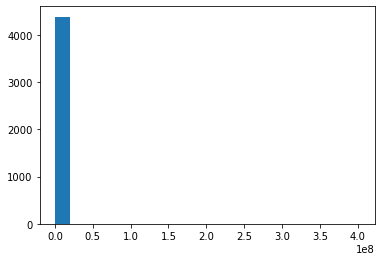

In [208]:
plot_distribution(exo_days_df["orb_days"])


<br>

**The above looks like we have an orbit that lasts 400 million days, and everything else is close to zero.
Thats crazy. The histogram isnt very helpful. To see exactly how many planets fall within each histogram
bin, we need drill into numpys histogram object. To suppress the scientific format, we are going to define
the float format as %d for integer**
<br>


In [209]:
hist, bin_edges = np.histogram(exo_days_df["orb_days"], bins=20)
bins_df = pd.DataFrame(bin_edges, columns=['bins'])
bins_df['freq']=pd.DataFrame(hist, columns=['freq'])
display_without_index(bins_df.dropna(),0)


bins,freq
0,4391
20100000,0
40200000,0
60300000,0
80400000,0
100500000,0
120600000,0
140700000,0
160800000,0
180900000,0


<br><br><br><br>
**Lets take a look at the one planet that takes 11 million years to complete one orbit.**
<br>





<br><br>
***

# COCONUTS-2 b

***


<br><br>

<figure>
  <img src="https://github.com/TheReallyBigApple/CunyAssignments/raw/main/DATA607/FinalProject/coconuts2b.webp" alt="coconuts 2b" style="width:100%">
  <figcaption>Artists rendition of coconuts 2-b.</figcaption>
</figure>

<br><br>
Coconuts is so named by the program "COol Companions ON Ultrawide orbitTS", at University of Hawaii.<a href="#bib-two">&#91;4&#93;</a> 
This program is a low volume research on objects detected over 500 AUs from a star.

Coconuts 2Its only 35 light years from us. A relative neighbor. 

Coconuts-2 b is a gas giant exoplanet that orbits an M-type star.  Its mass is equal to over 6 Jupiters!

It is 7506 AU from its star ( or put another way its 7500 times further from its sun than Earth is ) and it takes 1101369 years to complete one orbit of its star !

Although it was first noticed in 2011, it was thought to be a planet without a sun. Its amazing but true orbit was announced just this past year, in 2021.
<br><br>


In [210]:
coconuts_df=exo_days_df[exo_days_df["planet"]=="COCONUTS-2 b"][["planet", "star", "facility", "locale", "method", "orb_days","rel_date"]]
display_without_index(coconuts_df,0)

planet,star,facility,locale,method,orb_days,rel_date
COCONUTS-2 b,COCONUTS-2 A,NASA Infrared Telescope Facility (IRTF),Ground,Imaging,402000000,2021-08-16


<br><br><br><br>
**If we look at the longest, orbits, we notice they are all recent, and they were discovered via direct imaging.
This technique is capable of detecting exoplanets without the need of repeating transits to confirm our measurements.**
<br>

In [211]:
# yhead_df=exo_days_df.sort_values('orb_days',ascending=False).head(n=5)
# print(yhead_df[["planet", "method", "orb_days","rel_date"]].to_string(index=False))
# display(yhead_df[["planet", "method", "orb_days","rel_date"]])
display_the_biggest(exo_days_df)

planet,method,orb_days,rel_date
COCONUTS-2 b,Imaging,402000000.0,2021-08-16
CFHTWIR-Oph 98 b,Imaging,8040000.0,2021-05-17
Oph 11 b,Imaging,7300000.0,2016-03-10
HR 8799 b,Imaging,170000.0,2014-05-14
HR 8799 c,Imaging,69000.0,2014-05-14


<br><br><br><br>
**Lets compare the orbits by the various methods that astronomers use**
<br>

In [212]:
# the group by object is very convenient
# the agg function returns a multi indexed dataframe
# in order to make the column names more "normal"
#   reset_columns() and columns are both used

orb_grouped_obj = exo_days_df.groupby('method')
# pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:,.0f}'.format
# this indicates that Imaging captures extreme orbits
orb_stats_df=orb_grouped_obj.agg({'orb_days': ['count', 'mean', 'min', 'max']})
orb_stats_df=orb_stats_df.reset_index()
orb_stats_df.columns= ['method', 'count', 'mean', 'min', 'max']
orb_stats_df=orb_stats_df.sort_values('count',ascending=False)
display_without_index(orb_stats_df)


method,count,mean,min,max
Transit,3435,25.811,0.180,3650.000
Radial Velocity,891,1071.052,0.737,39000.000
Transit Timing Variations,22,210.058,2.156,2500.000
Eclipse Timing Variations,14,4008.042,237.690,10220.000
Imaging,9,46404559.889,7336.500,402000000.000
Microlensing,8,3002.250,1224.000,5480.000
Pulsar Timing,6,1721.738,0.091,10140.000
Orbital Brightness Modulation,4,2.154,1.545,3.295
Pulsation Timing Variations,2,1005.000,840.000,1170.000
Astrometry,1,246.360,246.360,246.360


<br><br><br><br>
**Lets remove Coconust 2-B and see what the distribution looks like now.**
<br>

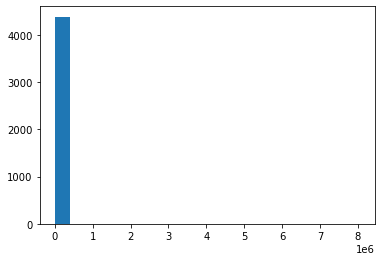

In [213]:
exo_days_df=exo_days_df[(exo_days_df["planet"]!='COCONUTS-2 b')]
plot_distribution(exo_days_df["orb_days"])

In [214]:
display_the_biggest(exo_days_df)

planet,method,orb_days,rel_date
CFHTWIR-Oph 98 b,Imaging,8040000.0,2021-05-17
Oph 11 b,Imaging,7300000.0,2016-03-10
HR 8799 b,Imaging,170000.0,2014-05-14
HR 8799 c,Imaging,69000.0,2014-05-14
HD 66428 c,Radial Velocity,39000.0,2021-09-20


<br><br><br><br>
**So now CFHTWIR-Oph 98 b and Oph 11 b which were previously grouped in the lowest bin are now the outliers.**
**Would it help if we scaled the remaining planets according to the log function?**
<br>

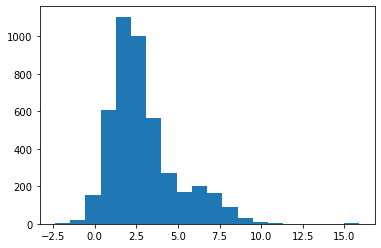

0       4.918154
1       7.151846
2       5.485867
3       1.529752
4       5.721950
          ...   
4546    6.682735
4547    7.480654
4548    5.224886
4549    6.246533
4550    5.786989
Name: orb_days, Length: 4391, dtype: float64

In [215]:
exo_log_series=plot_log_distribution(exo_days_df)           # returns a series

<br><br><br><br>
**The log function returns whatever exponent to raise e to, which would result in the number.
So for example, CFHTWIR-Oph 98 has an orbit of 8040000 days. So e to the power of 15 = 8040000.
The log functions is a good way scale down highly disparate numbers that dont fit into a plot well.**
<br><br>
**Lets remove the next few planets with large orbits and try again.**

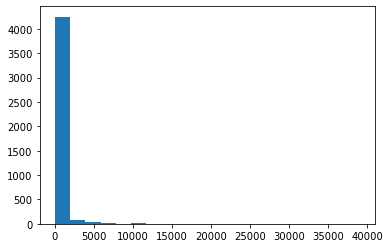

planet,method,orb_days,rel_date
HD 66428 c,Radial Velocity,39000.0,2021-09-20
HR 8799 d,Imaging,37000.0,2014-05-14
HD 26161 b,Radial Velocity,32000.0,2021-09-20
HR 5183 b,Radial Velocity,27000.0,2019-09-26
HD 145675 c,Radial Velocity,25000.0,2021-09-20


In [216]:

exo_days_df=exo_days_df[(exo_days_df["planet"]!='CFHTWIR-Oph 98 b') & \
                   (exo_days_df["planet"]!='Oph 11 b') & \
                       (exo_days_df["planet"]!='HR 8799 b') & \
                          (exo_days_df["planet"]!='HR 8799 c')  ]

plot_distribution(exo_days_df["orb_days"])

display_the_biggest(exo_days_df)


<br><br><br><br>
**Lets create a logarithmic distribution, then we can start to compare some standard deviations.**
<br>

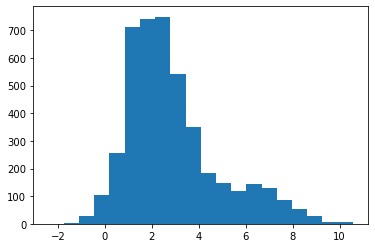

In [217]:
exo_log_series=plot_log_distribution(exo_days_df)           # returns a series

In [218]:
# To calculate z score, the x_bar would be the log(365) 
analyze_z_score(np.log(365), pd.DataFrame(exo_log_series, columns = ['orb_days']), 3)


Mean,Std Dev,Earth Z Score
2.888,1.975,1.525


**Revisiting the outlier question, if we continue to eliminate the top 5% again and again, we continue
to revisit highly skewed histograms, where in fact if we were to segregate the planets with orbits under 50 days we get... **

In [220]:

exo_day_gt_50=exo_days_df[(exo_days_df["orb_days"]>50)]
exo_day_lt_50=exo_days_df[(exo_days_df["orb_days"]<50)]
print("Orbit durations > 50 : ", len(exo_day_gt_50))
print("Orbit durations < 50 : ", len(exo_day_lt_50))


txt = "The percentage of planets with orbits greater than 50 days is {:0.2%} "
print(txt.format(len(exo_day_gt_50)/len(exo_days_df)))


exo_days_df= exo_days_df[(exo_days_df["orb_days"]<50)]


Orbit durations > 50 :  985
Orbit durations < 50 :  3402
The percentage of planets with orbits greater than 50 days is 22.45% 


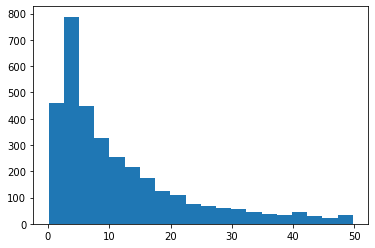

In [221]:
plot_distribution(exo_days_df["orb_days"])

***
# Sampling Bias of the Transmit Method
***

to do: create stacked bar chart

***
# The Trappist System
***



**All seven planets discovered in orbit around the red dwarf star TRAPPIST-1 could easily fit inside the orbit of Mercury.
All seven of them are similar in size to the Earth. The furthest one has the longest orbit at just 19 Earth days. Scientists believe they may all be rocky. Since the star is so faint, they think its the inner planets that might be habitable. They are so close to each other that if you were stand on any of the other planets, you might see all 6 of your neighbors by eye sight and some of them would be quite large.**

<figure>
  <img src="https://github.com/TheReallyBigApple/CunyAssignments/raw/main/DATA607/FinalProject/ssc2017-01b.jpg" alt="coconuts 2b" style="width:100%">
  <figcaption>Artists rendition of the Trappist system.</figcaption>
</figure>




In [224]:
trap_df=exo_data_server.get_by_star("TRAPPIST-1")
display_without_index(trap_df[["planet","method", "orb_days", "orb_eccentricity","orb_inclination","orb_aus"]]) 

planet,method,orb_days,orb_eccentricity,orb_inclination,orb_aus
TRAPPIST-1 h,Transit,18.773,NaN,89.805,0.061890
TRAPPIST-1 g,Transit,12.352,NaN,89.742,0.046830
TRAPPIST-1 f,Transit,9.208,NaN,89.740,0.038490
TRAPPIST-1 e,Transit,6.101,NaN,89.793,0.029250
TRAPPIST-1 d,Transit,4.049,NaN,89.896,0.022270
TRAPPIST-1 c,Transit,2.422,NaN,89.778,0.015800
TRAPPIST-1 b,Transit,1.511,NaN,89.728,0.011540


**These are the kind of planets that the transit method is very good at capturing. The planets of the Trappist system are constantly crossing the path of its sun**


***
# Conclusion
***
<br>
Despite the impressive and exciting progress in the field of exoplanet research, 
we cant really use inferential statistics yet. Our data is biased towards the technological capabilities
weve thus far been using. Maybe in a 100 years we can.
<br>
Also if the goal is to understand orbits, then you would like to also consider non-planetary objects.
<br>
However this study illustrates that different technologies and different programs are focusing in on
particular types of planets. There is a fantastic spectrum of objects orbiting their host stars.
<br>




***
# References
***
<br>

<li>
    <a name=bib-one></a><a href="#cite_one"></a><b>[1]</b>Clavin, Whitney; Chou, Felicia; Johnson, Michele (6 January 2015).<a href="http://www.jpl.nasa.gov/news/news.php?release=2015-003">"NASA's Kepler Marks 1,000th Exoplanet Discovery, Uncovers More Small Worlds in Habitable Zones". NASA. Retrieved 6 January 2015</a>
</li>
<br>

    
    
<br>
    <li><a name=bib-two></a><a href="#cite_two"></a><b>[2]</b>IPAC Caltech <a href="https://www.ipac.caltech.edu/page/history">"IPAC History"</a></li>
<br>

    
    
<br>
<li><a name=bib-three></a><a href="#cite_three"></a><b>[3]</b>IPAC Caltech <a href="https://www.ipac.caltech.edu/page/mission">"IPAC Mission"</a>
</li>
<br>


<br>   
<li>
    <a name=bib-four></a><a href="#cite_four"></a><b>[4]</b>Dr. David R. Williams (21 October 2019)<a href="https://nssdc.gsfc.nasa.gov/planetary/factsheet/">"Planetery Fact Sheet". NASA. Retrieved 6 January 2015</a>
</li>
<br>    
 

<br>
<li><a name=bib-five></a><a href="#cite_five"></a><b>[5]</b>ZJ Zhang<a href="https://zjzhang42.github.io/coconuts.html">"COol Companions ON Ultrawide orbiTS (COCONUTS)"</a>
</li>
<br>



<br>
<li><a name=bib-six></a><a href="#cite_six"></a><b>[6]</b>Spitzer Space Telescope<a href="https://exoplanets.nasa.gov/trappist1/#Poster">"Abstract Concept of TRAPPIST-1 System"</a>
</li>
<br>